## Intro

Plots.jl is an interface for many different backends.  But which backend to choose?

Each one supports different features, outputs slightly differently, and takes up different amounts of resources.  Below, you will see three different plots generated for each of the different backends I tried to get working.  I have historically used pyplot, gr, and plotlyjs, so those were already working for me.  The pdfplots, unicodeplots, and inspectdr did not work out of the box.  If you have timing information on these, feel free to contribute to this repsitory.  
 
Julia optimizes and compiles a function the first time it runs, and the macro `@time` reflects that.  Therefore, I run the function twice, and take the data reported on the second run.

## Test1 

I'll first run on a very simple function:
 
     plot(x,y)
    
Remember that though `@time` returned a time and memory usage for pgfplots, unicodeplots, and inspectdr, none of these backends worked for me.  
    
| Backend | Time | Mem |
| --- | --- | --- | 
| pyplot | .0017 | 122 kB |
| gr | .0014 | 122 kB |
| plotlyjs | .0039 | 164 kB |
| pgfplots | .0012 | 129 kB | 
| unicodeplots | .0014 | 128 kB | 
| inspectdr | .0024 | 130 kB | 

## Test2

Next, I'll compare on something more intensize:

       heatmap(z2d,
            title="title",
            xlabel="xlabel",
            ylabel="ylabel",
            seriescolor=:viridis
            ) 
        annotate!(50,50,"Hi! How long with this take?")
        
Neither pgfplots, unicodeplots, nor inspectdr support heatmap.  While for the first test, the plots looked quite similiar, in this test, differences in how they place and render things start to show.  

| Backend | Time | Mem | 
| --- | --- | --- | 
| pyplot | .0027 | 538 kB |
| gr | .003 | 538 kB | 
| plotlyjs | .019 | 2.1 Mb | 

## Test 3 

My third function 

        plot(x,y1,linetype=:sticks)
        plot!(x,y2,line=:dot)
        plot!(x,y3,width=10,linealpha=.2)
        scatter!(x,y4,marker=Shape(custom_marker))
        
also posed issues for pgfplots, unicodeplots, and inspectdr.

| Backend | Time | Mem | 
| --- | --- | --- | 
| pyplot | .004 | 643 kB | 
| gr | .010 | 643 kB | 
| plotlyjs | .03 | 1.5 MB | 

Plotlyjs would not support a custom marker.

## Conclusion

In conclusion, pyplot and gr seem fairly comparable in terms of timing, memory, and features.  They just differ slightly in terms of aesthetics.  Plotlyjs consumes a great deal more memory and takes much longer, but it provides interactive functionality the others don't.

In [1]:
using Plots

In [3]:
x=collect(0:.1:4π);
y=cos.(x);

  0.001741 seconds (2.25 k allocations: 122.359 KiB)



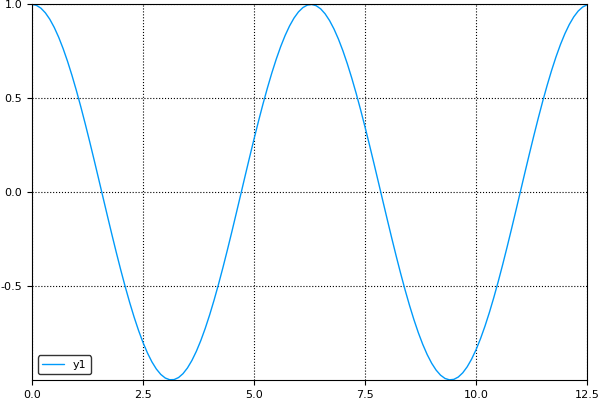

In [5]:
pyplot()
@time plot(x,y)
@time plot(x,y)

In [6]:
gr()
@time plot(x,y)
@time plot(x,y)

  7.037715 seconds (3.39 M allocations: 174.141 MiB, 2.07% gc time)
  0.001456 seconds (2.24 k allocations: 122.016 KiB)


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.0 
 
 
 2.5 
 
 
 5.0 
 
 
 7.5 
 
 
 10.0 
 
 
 12.5 
 
 
 -0.5 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,7.87402 43.7921,8.77498 48.2142,11.4689 52.6362,15.9288 57.0583,22.1101 61.4803,29.9511 65.9024,39.3735 70.3244,50.283 74.7465,62.5707 79.1685,76.1139 
 83.5906,90.7771 88.0126,106.414 92.4346,122.868 96.8567,139.975 101.279,157.564 105.701,175.46 110.123,193.483 114.545,211.453 118.967,229.191 123.389,246.52 
 127.811,263.266 132.233,279.262 136.655,294.348 141.077,308.375 145.499,321.2 149.921,332.697 154.343,342.75 158.765,351.259 163.187,358.14 167.609,363.322 
 172.031,366.755 176.454,368.403 180.876,368.252 185.298,366.301 189.72,362.572 194.142,357.1 198.564,349.94 202.986,341.165 207.408,330.862 211.83,319.133 
 216.252,306.096 220.674,291.882 225.096,276.632 229.518,260.498 233.94,243.642 238.362,226.232 242.784,208.443 247.206,190.451 251.628,172.437 256.05,154.581 
 260.472,137.06 264.894,120.051 269.317,103.723 273.739,88.2393 278.161,73.7545 282.583,60.4133 287.005,48.3491 291.427,37.6823 295.849,28.5197 300.271,20.9527 
 304.693,15.057 309.115,10.8914 313.537,8.49762 317.959,7.89951 322.381,9.10307 326.803,12.0963 331.225,16.8492 335.647,23.3144 340.069,31.4272 344.491,41.1066 
 348.913,52.2559 353.335,64.7637 357.757,78.505 362.18,93.3424 366.602,109.128 371.024,125.704 375.446,142.904 379.868,160.557 384.29,178.486 388.712,196.513 
 393.134,214.457 397.556,232.138 401.978,249.381 406.4,266.012 410.822,281.867 415.244,296.785 419.666,310.619 424.088,323.23 428.51,334.491 432.932,344.292 
 437.354,352.532 441.776,359.131 446.198,364.023 450.62,367.157 455.043,368.504 459.465,368.049 463.887,365.798 468.309,361.772 472.731,356.012 477.153,348.576 
 481.575,339.537 485.997,328.986 490.419,317.029 494.841,303.785 499.263,289.386 503.685,273.976 508.107,257.71 512.529,240.749 516.951,223.263 521.373,205.427 
 525.795,187.419 530.217,169.418 534.639,151.606 539.061,134.16 543.483,117.253 547.906,101.056 552.328,85.7298 556.75,71.4274 561.172,58.292 565.594,46.4547 
 570.016,36.0338 574.438,27.1335 578.86,19.8427 583.282,14.2342 587.704,10.3641 592.126,8.27108 
 "/>
 
 
 
 
 y1

In [13]:
plotlyjs()
@time plot(x,y)
@time plot(x,y)

  0.006211 seconds (2.78 k allocations: 164.047 KiB)
  0.003971 seconds (2.78 k allocations: 164.047 KiB)


In [21]:
pgfplots()
@time plot(x,y)
@time plot(x,y)

  0.952490 seconds (185.53 k allocations: 9.549 MiB)
  0.001501 seconds (2.54 k allocations: 129.484 KiB)
Error saving as SVG


Base.UVError: [91mcould not spawn `pdf2svg tikzpicture.pdf tikzpicture.svg`: no such file or directory (ENOENT)[39m

In [22]:
unicodeplots()
@time plot(x,y)
@time plot(x,y)

  0.776034 seconds (180.62 k allocations: 9.419 MiB)
  0.001443 seconds (2.53 k allocations: 128.984 KiB)


StackOverflowError: [91mStackOverflowError:[39m

In [23]:
inspectdr()
@time plot(x,y)
@time plot(x,y)

  0.002026 seconds (2.56 k allocations: 130.984 KiB)
  0.001734 seconds (2.56 k allocations: 130.984 KiB)


ErrorException: [91mtype Multiplot has no field frame[39m

## more elaborate test

In [30]:
x2d=repmat(x,1,length(x))
y2d=repmat(transpose(x),length(x),1)
z2d=sin.(x2d).*sin.(y2d);

function plot2()
   heatmap(z2d,
        title="title",
        xlabel="xlabel",
        ylabel="ylabel",
        seriescolor=:viridis
        ) 
    annotate!(50,50,"Hi! How long with this take?")
    
end

plot2 (generic function with 1 method)

  0.004802 seconds (19.08 k allocations: 538.969 KiB)
  0.002744 seconds (19.08 k allocations: 538.969 KiB)



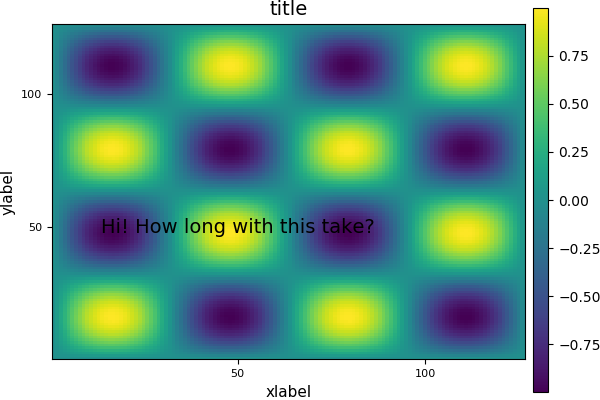

In [33]:
pyplot()
@time plot2()
@time plot2()

In [32]:
gr()
@time plot2()
@time plot2()

  4.424758 seconds (2.18 M allocations: 106.800 MiB, 16.67% gc time)
  0.003023 seconds (19.07 k allocations: 538.625 KiB)


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 50 
 
 
 100 
 
 
 50 
 
 
 100 
 
 
 title 
 
 
 xlabel 
 
 
 ylabel 
 
 
<image width="493" height="361" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAe0AAAFpCAYAAACxlXA1AAAgAElEQVR4nO2923rjSNJkGwBISplZ
Vd37Efb77ov9qn9XpiSSOMxFzjeKWE66KZrK6kKP2ZVcAeJsJLDCw2P4f////28rtbahtHEbojW0
h1gsP3Quny/b7l3Y107FTauTUT7enp/m+FmxLV62+Pl839Pti3XHz37iefpIe743nVIn+sHNJyc6
eKHTW/rzn+jt3s8+3P553v6lvr7R3u3tKtafFb7uPRb5+Y5z9bCvf7GXezbV265+izq9Xn9+FLti
WZZlWdbfRP7RtizLsqyd6BD+w9fyNY/LOqTtAdmpdoXPM0T3KE1RGtpj7cFeATPhcSmQSz5OhXZs
nctz/SP2nScrLL/dbSti29y3oRPpDQqv97BYLivvEcE2N4ZYnv7g8sRmlX+24JV83QPaN+Et6UWx
/np56fMHfU/9Um8/4OtSPsHbXd4T61b7or43er4XivD2r/T1reUf8bbwqcLf9K7y5iPe9pu2ZVmW
Ze1E/tG2LMuyrJ0o4PFAMPjavgDvLWxXnxftEsff39fPxuUy87IDgxGJBUQ25e0hntqNrVM+CCBI
4fZ6fdi3MnHZ9iKNRGiIVbuKR1zY5lCytnKLoOWYi5hsA7ZaVXvAXNijyk9Z262YxzKoi668qLy9
fqztZszlP7vbrENqpIVsl958bPlSe5u+xqKBT+PEpL7+SKy8O91vDz4exLroXYHLpbfpTTTX3qX3
pO/pxQ6f/1yB8PbcNtfe9pu2ZVmWZe1E/tG2LMuyrJ1IZ48TmeG1fST2Yjtf89XyHdgtQ+elfELG
qcBmEnvVeJzIDPF66GunBrKklZiMH0Cc4fpDe2KHAzAX8TiWn9B+mPL2aRQxMVsVhwxVIeJw4u4V
J24B1lpWtrfxvKCd8fwer2jbBvFMrbLNVTEVLK+8XMfS96rbrBOv/6V4vBd/06uifYOXYdXmnly5
c6PA5VTwNT5xIO7u8/LE9sqrwefB1/Qxti1xea4eb8/Bx/D5Ql+3F5Xe5fLrTPwtvJ1kl/tN27Is
y7J2Iv9oW5ZlWdZO1J09LrHYtTOWOB0Ipdp+RGrkIWgvELGUxGZAHAKb1ZhsOwDN4MwTF67HfF9J
D4mOuK9DEVgtyTIlDp8O7c5OxzY+Ij5h+dOE5SfRjpvuMBKjrdXffRmmzBJdGAObXcE+GV+AzS4z
lmf7+H4jzHO7d7glysYbjhmr4dhxD4SuL8TCi7V3lY8HtmNbI45VjzIJVW3a9lLS9uayPuzr3Msj
8Te8vAr0XzezhyQU6aBCt1eeHU4cPh3RlUVv08uHGfF7e/B18HHua3aDhezy0kp7G4i78vaVPqdP
Q9xe5Ouc+34ZEId9xYXmdau+4P2mbVmWZVk7kX+0LcuyLGsnktnjqiBDwGSXNp5kO/B3wG5AItX2
xyVHbEzLVBmn3XhcYLM6S5QIbQEyG445ygwSCI+fD3WtVd3fCs8wO5w4/OnUIrKnYxt/ObQX9RlI
7RntTxOQGzDacbiP1UYWYAgnog0XnEgitIDNgMPPuLBvc3th36a2/RXt7f5xCAFRPe6v5T5Cu6ne
AiiJd+nTCb4e6euA3tkucPlnejvg8HykhcLhAX/TywKHZ9nrQ/A1F2ZRpbw4SihUdMhxOL38fISX
E68/08fB121MPH5gNjlu4NAlGLoZ7uPwUkqZqy/NC30N/P225D5+GzNfl3Judy2ie3b/wIt1q9+0
LcuyLGsn8o+2ZVmWZe1ED0/NSexFHB6w2RmZyBfECqtd33dgCEjtPkovpZQhMOJWcVo7YjTW+0b7
kRjtPQ44nIP3w9xufRmtEidC8Vjv1xQmQmMGKRHat+Mljb8yxk3zBfEzWOwTbopjFU8KobVhKJ5y
xYm9EH8jfl1ObYx9exnb9lBvud43Fn9gwYeRGaalS0SrCo9n2eP09SR8HXF53h5HjYRKGe3yj+Dx
UMf/vo9LifibdaiXgMOZ5Y9mXMcaiUu0TqluL2SPszgKs8GfT6336N3f6OXDe0wfB19Pua8PuCEn
nIyQPS66vsJIj6r/8hVf0MHXaD+GESzit4X3AIuv8LclqcvuN23LsizL2on8o21ZlmVZO9GN4iqd
BRkUUgMmOxCbKVx+AYZo8DhwScDlYEtx9H0bByQNADMBaRyIx4EzT+/xQNQZaIrA4cxoZXGWXowm
qlPUWaasN0w8zmxw4vDfj23u5G+Mp7c2PrTtXzHkgLj8VFUFYcapKiqzEIcjPm8tFnsBNvsxPjXx
d8REejRUXQ85ZLeioMOC+31h5Q1Vm1mNDBFdX3UcfYo4+Bo+DvicXkYM5hwLKYkbvvI2cfgGX48H
+By+jjicZs13RY1CaUaddPsaElNram+3XiMOD96uvPvbAb6e2mW/SF8rPE5vt+d1xpfmZWNX17u3
X6fW198X+HoWvoZY55zeZjGWAV1fYSBIFftN27Isy7J2osfHaavxl2Gsp3hCf8PTVXhCf28fru2y
fDoPGSF8sxZv2nyz5hP5gCfy7cTB2FUp0DBcGJ9ljlGY5QsERMySFKkCYpWIViVa8GmcZUk5DrtO
RimllG94Gv/H4TWNf5/aODyhD+366wSWAwY4MkGEl3wu95NTSinlFYNw+Wb9hBucb/oUZ22aq+SY
UDqRJVBxUyyh1GG66UjNeilalSzGxLH4pr2m8XjGdaKXw5s36/ziPKs37frtFm81G318wFvQCXGY
xgvbGoS3ORx/ZmJbvS2sWpVmFoloHKfNmbiegrfbL3h6m1Tsn8eX//P3H8HX7Zv3tzF/835CXV0m
mdLb4e0W37GkZrW3f6zPTduJ2xa+VvUd6OXL1MYz4jVJbPObtmVZlmXtRP7RtizLsqydSI/TVuO2
xUxBkxiPGTEasNl5Rly1X9q2iNAYfzxZ5efGBA4/tqdvCzMRVe0k7xyrGZJh2gXi7GdtHLoxehNW
wqFXiWgYk8hZuFiukLj89ynH4/88/Gjbgcd/H1us9hVYrcZoB4HQIh7Pk1U4zvpp5VjSfOzogv+E
MqhVmdOXqcV3PO9Em3EMel6ytTsRLekKi7P3icQz+voNvqaXr7jh6W3V9UUN9/H4ABxOX4f6D52J
ZhPH4IoyqPV1eNTHXMHImbSYiEZvh64veBvJZrW3/zm9NG1/IKav+/F4E0o8Hrw9vHtbbYsiDmc9
hzPLF+O88rzT21k3h9+0LcuyLGsn8o+2ZVmWZe1EN8Zp4x8PljXl2OlQzhBZo3V2eCkRow3nCs8E
hIaYCC0MeoQEHi/MKg3rx7FVf8exmcDhx95ZjzpnElJilulwH48fwU05ew/LFX4DHmcWKXE4sdrv
Y9v+FdNPNXicOLC04mnBaQ4I7WlDyVRkp3OsaMBmHBsKBP5axZzNjJm9HGMrS1YKdWeP1zPsBV9z
lAfxOLu52ms4II7eJh7nNEgdeByZumVhdnhupjDwImSH52VP2e0wLImXVbdXOOy8CyVkj4euL8zY
N9LbGBmSePsf8DHjgMeDr+GHIb8OPBVX4PIzvFhniMvscIHaXxNflxK7HaakTOmt2LN8WZZlWdYO
5R9ty7Isy9qJYvY41I/LOTtP266w2gA8PiCrtFwSPH5t8cpGXB6yx/PiKkPAaEjz3IhriNffY5ZG
ZMnTEQUWFKoU1TGjRHEVYt66PgRRTkBquMgsR/iVSA1Y7DfExOG/Dyxriu1VJwNXKGSYKjz+t

In [34]:
plotlyjs()
@time plot2()
@time plot2()

  2.029910 seconds (463.27 k allocations: 26.021 MiB, 1.92% gc time)
  0.019985 seconds (20.45 k allocations: 2.110 MiB)


In [35]:
pgfplots()
@time plot2()
@time plot2()

LoadError: [91mThe backend must not support the series type Val{:heatmap}, and there isn't a series recipe defined.[39m

In [36]:
unicodeplots()
@time plot2()
@time plot2()

LoadError: [91mThe backend must not support the series type Val{:heatmap}, and there isn't a series recipe defined.[39m

In [37]:
inspectdr()
@time plot2()
@time plot2()

LoadError: [91mThe backend must not support the series type Val{:heatmap}, and there isn't a series recipe defined.[39m

In [53]:
x=collect(0:0.01:5)
y1=x;
y2=x.^2;
y3=10*sin.(x);
y4=randn(length(x));

custom_marker=[(-1,-1),
        (-1,1),
        (1,1),
        (1,-1)];

function plot3()
    plot(x,y1,linetype=:sticks)
    plot!(x,y2,line=:dot)
    plot!(x,y3,width=10,linealpha=.2)
    scatter!(x,y4,marker=Shape(custom_marker))
    
end

plot3 (generic function with 1 method)

  0.016537 seconds (16.89 k allocations: 694.641 KiB)
  0.004003 seconds (15.97 k allocations: 643.922 KiB)



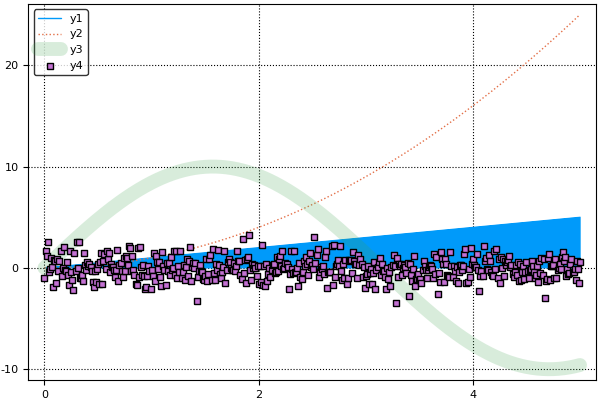

In [54]:
pyplot()
@time plot3()
@time plot3()

In [55]:
gr()
@time plot3()
@time plot3()

  0.113552 seconds (35.84 k allocations: 1.690 MiB)
  0.010482 seconds (15.96 k allocations: 643.578 KiB)


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 2 
 
 
 4 
 
 
 -10 
 
 
 0 
 
 
 10 
 
 
 20 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" stroke-dasharray="1, 2" points="
 55.0141,261.093 56.057,261.092 57.1,261.089 58.1429,261.084 59.1859,261.077 60.2288,261.068 61.2717,261.058 62.3147,261.045 63.3576,261.031 64.4005,261.014 
 65.4435,260.996 66.4864,260.975 67.5293,260.953 68.5723,260.929 69.6152,260.902 70.6581,260.874 71.7011,260.844 72.744,260.812 73.787,260.778 74.8299,260.742 
 75.8728,260.704 76.9158,260.664 77.9587,260.622 79.0016,260.579 80.0446,260.533 81.0875,260.485 82.1304,260.436 83.1734,260.384 84.2163,260.331 85.2592,260.275 
 86.3022,260.218 87.3451,260.159 88.3881,260.097 89.431,260.034 90.4739,259.969 91.5169,259.902 92.5598,259.833 93.6027,259.762 94.6457,259.689 95.6886,259.614 
 96.7315,259.538 97.7745,259.459 98.8174,259.378 99.8603,259.295 100.903,259.211 101.946,259.124 102.989,259.036 104.032,258.946 105.075,258.853 106.118,258.759 
 107.161,258.663 108.204,258.564 109.247,258.464 110.29,258.362 111.333,258.258 112.376,258.152 113.419,258.044 114.461,257.935 115.504,257.823 116.547,257.709 
 117.59,257.593 118.633,257.476 119.676,257.356 120.719,257.235 121.762,257.111 122.805,256.986 123.848,256.859 124.891,256.729 125.934,256.598 126.977,256.465 
 128.02,256.33 129.063,256.193 130.105,256.054 131.148,255.913 132.191,255.77 133.234,255.625 134.277,255.478 135.32,255.33 136.363,255.179 137.406,255.026 
 138.449,254.872 139.492,254.715 140.535,254.557 141.578,254.396 142.621,254.234 143.664,254.07 144.707,253.904 145.75,253.735 146.792,253.565 147.835,253.393 
 148.878,253.219 149.921,253.043 150.964,252.865 152.007,252.686 153.05,252.504 154.093,252.32 155.136,252.134 156.179,251.947 157.222,251.757 158.265,251.566 
 159.308,251.372 160.351,251.177 161.394,250.98 162.436,250.78 163.479,250.579 164.522,250.376 165.565,250.171 166.608,249.964 167.651,249.755 168.694,249.544 
 169.737,249.331 170.78,249.116 171.823,248.899 172.866,248.681 173.909,248.46 174.952,248.237 175.995,248.013 177.038,247.786 178.081,247.558 179.123,247.328 
 180.166,247.095 181.209,246.861 182.252,246.625 183.295,246.387 184.338,246.147 185.381,245.905 186.424,245.661 187.467,245.415 188.51,245.167 189.553,244.917 
 190.596,244.665 191.639,244.411 192.682,244.156 193.725,243.898 194.767,243.639 195.81,243.377 196.853,243.114 197.896,242.848 198.939,242.581 199.982,242.312 
 201.025,242.041 202.068,241.767 203.111,241.492 204.154,241.215 205.197,240.936 206.24,240.655 207.283,240.373 208.326,240.088 209.369,239.801 210.412,239.512 
 211.454,239.222 212.497,238.929 213.54,238.635 214.583,238.338 215.626,238.04 216.669,237.739 217.712,237.437 218.755,237.133 219.798,236.827 220.841,236.518 
 221.884,236.208 222.927,235.896 223.97,235.582 225.013,235.266 226.056,234.949 227.098,234.629 228.141,234.307 229.184,233.983 23

In [56]:
plotlyjs()
@time plot3()
@time plot3()

  0.727644 seconds

 (147.13 k allocations: 7.843 MiB)
  0

.031552 seconds (28.30 k allocations: 1.552 MiB)


In [57]:
pgfplots()
@time plot3()
@time plot3()

  0.

196551 seconds (42.33 k allocations: 2.040 MiB)


  0.097423

 seconds (16.32 k allocations: 667.125 KiB)
Error saving as SVG


Base.UVError: [91mcould not spawn `pdf2svg tikzpicture.pdf tikzpicture.svg`: no such file or directory (ENOENT)[39m

In [58]:
unicodeplots()
@time plot3()
@time plot3()

 0.268607 seconds (43.18 k allocations: 2.086 MiB)


  0.

linestyle dot is unsupported with Plots.UnicodePlotsBackend().  Choose from: Symbol[:auto, :solid]


051518 seconds (17.62 k allocations: 747.703 KiB, 56.63% gc time)


StackOverflowError: [91mStackOverflowError:[39m

In [59]:
inspectdr()
@time plot3()
@time plot3()

  0.068876 seconds (27.56 k allocations: 1.249 MiB)
  0.004075 seconds (15.98 k allocations: 645.078 KiB)


ErrorException: [91mtype Multiplot has no field frame[39m